In [1]:
#basic data sciency stuff
import pandas as pd 
import sklearn as sk
from sklearn.linear_model import LinearRegression

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('speed_dating.csv', encoding='unicode_escape')
df.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

# Selecting and cleaning part

In [4]:
df1 = df[['intel_o', 'amb_o', 'fun_o','sinc_o', 'attr_o', 'dec_o']]
df1 = df1.dropna() #get rid of rows with empty cells
df1.head(20)


,intel_o,amb_o,fun_o,sinc_o,attr_o,dec_o
0,8.0,8.0,8.0,8.0,6.0,0
1,10.0,7.0,7.0,8.0,7.0,0
2,10.0,10.0,10.0,10.0,10.0,1
3,9.0,9.0,8.0,8.0,7.0,1
4,9.0,9.0,6.0,7.0,8.0,1
5,8.0,7.0,8.0,7.0,7.0,1
6,7.0,8.0,5.0,6.0,3.0,0
7,5.0,8.0,6.0,7.0,6.0,0
8,8.0,8.0,8.0,7.0,7.0,1
9,6.0,6.0,6.0,6.0,6.0,0


# Plotting

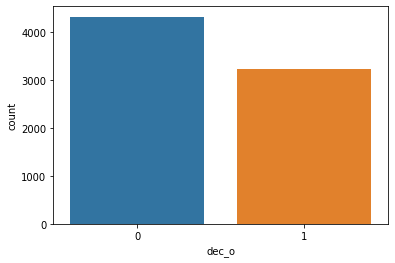

In [5]:
sns.countplot(x='dec_o', data=df1)
plt.show()

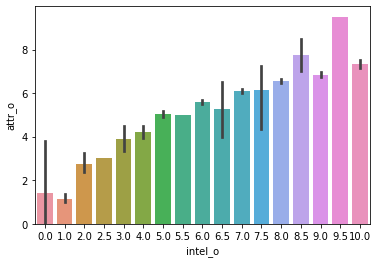

In [6]:
sns.barplot(data=df1, x='intel_o', y='attr_o')
plt.show()

# Building a model

In [8]:
X = df1[['intel_o', 'amb_o', 'fun_o','sinc_o', 'attr_o']] #create the X matrix

y = df1['dec_o'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,intel_o,amb_o,fun_o,sinc_o,attr_o
916,8.0,8.0,6.0,7.0,7.0
1595,7.0,7.0,6.0,9.0,7.0
1866,9.0,9.0,7.0,8.0,6.0
5249,5.0,6.0,5.0,9.0,5.0
3929,7.0,7.0,5.0,6.0,8.0


In [9]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 3 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data


In [10]:
knn.n_samples_fit_

5285

In [11]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.7025595763459841

In [12]:
from sklearn.metrics import classification_report

for i in range(1,5):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall


With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1310
           1       0.61      0.60      0.61       956

    accuracy                           0.67      2266
   macro avg       0.66      0.66      0.66      2266
weighted avg       0.67      0.67      0.67      2266

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.66      0.85      0.75      1310
           1       0.67      0.41      0.51       956

    accuracy                           0.67      2266
   macro avg       0.67      0.63      0.63      2266
weighted avg       0.67      0.67      0.65      2266

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1310
           1       0.62      0.62      0.62       956

    accuracy                           0.68      2266
   macro avg       0.67      0.6

# Evaluation

In [13]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[999, 311],
       [363, 593]])

In [14]:
TP = 593
TN = 999
FP = 311
FN = 363

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)


Accuracy:  0.7025595763459841
Precision:  0.6559734513274337
Recall:  0.6202928870292888


It means that the classifier is able to predict the labels correctly in 69.33% of the cases. It could identify correctly 65.48% of the samples labeled as 1, and it could detect 61.97% of the samples labeled as 1.
